In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df_pic = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/5_task_1.csv")

In [3]:
df_pic

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


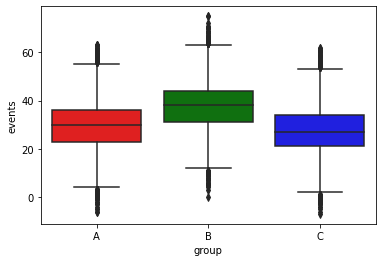

In [5]:
sns.boxplot(x="group", y="events", data=df_pic, palette=["r", "g", "b"])

In [6]:
pg.homoscedasticity(data=df_pic, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [15]:
print("A:", ss.normaltest(df_pic.query("group == 'A'").events))
print("B:", ss.normaltest(df_pic.query("group == 'B'").events))
print("C:", ss.normaltest(df_pic.query("group == 'C'").events))

A: NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
B: NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
C: NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


In [16]:
pg.normality(data=df_pic, dv="events", group="group", method="normaltest")

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


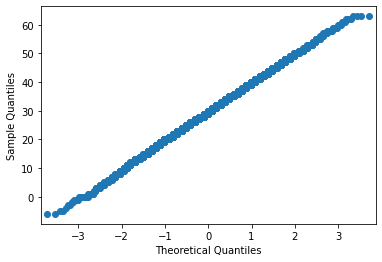

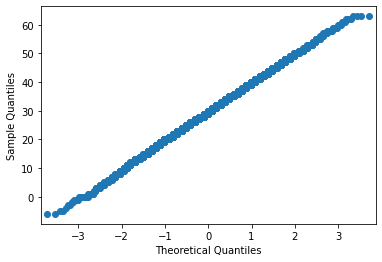

In [17]:
sm.qqplot(df_pic.query("group == 'A'").events)

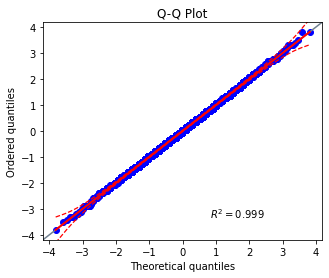

In [20]:
pg.qqplot(df_pic.query("group == 'B'").events)

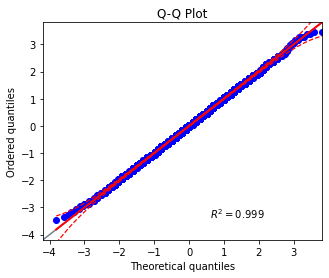

In [21]:
pg.qqplot(df_pic.query("group == 'C'").events)

In [22]:
ss.f_oneway(df_pic.query("group == 'A'").events, df_pic.query("group == 'B'").events, df_pic.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [23]:
pg.pairwise_tukey(data=df_pic, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [24]:
pairwise_tukeyhsd(df_pic.events, df_pic.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [25]:
df_button = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/5_task_2.csv")

In [29]:
df_button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [38]:
test_group = df_button.query("group == 'test'")
control_group = df_button.query("group == 'control'")

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


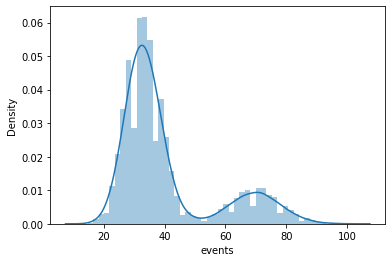

In [47]:
sns.distplot(test_group.events)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


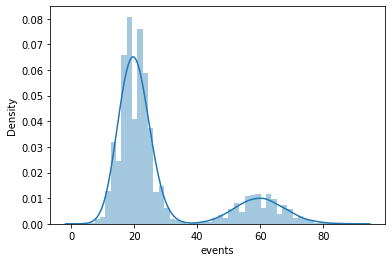

In [48]:
sns.distplot(control_group.events)

In [55]:
df_button.groupby(["group", "segment"]).events.describe().reset_index()

,group,segment,count,mean,std,min,25%,50%,75%,max
0,control,high,10000.0,59.970800,7.805347,31.0,55.0,60.0,65.0,89.0
1,control,low,40000.0,20.031575,4.473576,4.0,17.0,20.0,23.0,41.0
2,test,high,10000.0,69.938500,8.403974,40.0,64.0,70.0,76.0,102.0
3,test,low,40000.0,33.025925,5.720845,13.0,29.0,33.0,37.0,59.0


In [56]:
round(7.805347, 2)

7.81

In [58]:
df_button["combination"] = df_button["group"] + ' \ ' + df_button['segment']

In [59]:
df_button

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [61]:
pg.anova(data=df_button, dv="events", between="combination")

,Source,ddof1,ddof2,F,p-unc,np2
0,combination,3,99996,267619.354959,0.0,0.889245


In [63]:
model_interact = smf.ols("events ~ segment + group + segment:group", data=df_button).fit()
anova_lm(model_interact, typ=2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [64]:
pg.pairwise_tukey(data=df_button, dv="events", between="combination")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control \ high,control \ low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control \ high,test \ high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control \ high,test \ low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control \ low,test \ high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control \ low,test \ low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test \ high,test \ low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


In [65]:
pairwise_tukeyhsd(df_button.events, df_button.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


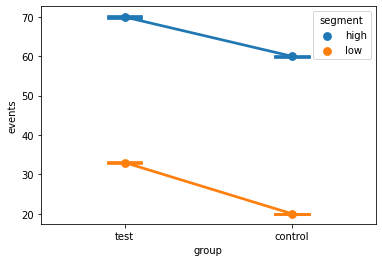

In [71]:
sns.pointplot(x="group", y="events", data=df_button, hue = "segment",capsize=0.2)